In [25]:
from fenics import *
import matplotlib.pyplot as plt
from mshr import *
import numpy as np

Consider the one-dimensional Burgers equation on the spatial domain $\mathcal{D} = [-1, 1]$.
$$
    \begin{equation}
        \begin{aligned}
            \partial_t u + u \partial_x u - (0.01/\pi) \partial_{xx} u &= 0, && (t,x) \in (0,1] \times (-1,1) \\
            u(0,x) &= \sin (\pi x), && x \in [-1, 1]\\
            u(t, -1) = u(t,1) &= 0, && t \in (0,1]
        \end{aligned}
    \end{equation}
$$

La formula variacional esta dada por:
$$ \int_{\Omega} (u^{k} - u^{k-1})v \, dx = -dt \int_{\Omega} u (\nabla u) v \, dx + dt c \int_{\Omega} \Delta u v \, dx  $$

Aplicando Teorema de Green en la segunda integral del lado derecho obtenemos que:
$$ \int_{\Omega} \Delta u v \, dx = \int_{\partial \Omega} \frac{\partial u}{\partial \eta} v \, dS - \int_{\Omega} \nabla u \nabla v \, dx$$
Como $v \in H^1_0(\Omega)$ se anula en frontera y:
$$ \int_{\Omega} \Delta u v \, dx = - \int_{\Omega} \nabla u \nabla v \, dx$$
Aplicando Teorema de Green en la primera integral obtenemos que:
$$ \int_{\Omega} u (\nabla u) v \, dx = \int_{\partial \Omega} \frac{\partial u \nabla u}{\partial \eta} v \, dS - \int_{\Omega} u (\nabla u \cdot \nabla v) \, dx$$
Entonces:
$$ \int_{\Omega} (u^{k} - u^{k-1})v \, dx = dt \int_{\Omega} u^k (\nabla u^k \cdot \nabla v) \, dx - dt c \int_{\Omega} \nabla u^k \nabla v \, dx $$
Finalmente:
$$ \int_{\Omega} u^k v - dt (\nabla u^k \cdot \nabla v) (u^k - c) \, dx = \int_{\Omega} u^{k-1}v \, dx $$

In [41]:
# Define the spatial domain
mesh = IntervalMesh(100, -1, 1)
V = FunctionSpace(mesh, 'Lagrange', 1)

# Define boundary condition
g = Constant(0.0)
bc = DirichletBC(V, g, 'on_boundary')

# Define the initial condition
u0 = Expression('-sin(pi*x[0])', degree=2)
u_n_old = interpolate(u0, V)

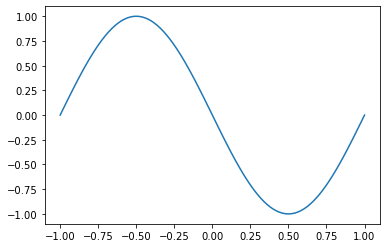

In [43]:
plot(u_n_old)


In [44]:
def alpha_(u):
    return u - (0.01/np.pi)

Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
Solving linear variational problem.
*** Warning: Degree of exact solution may be inadequate for accurate result in err

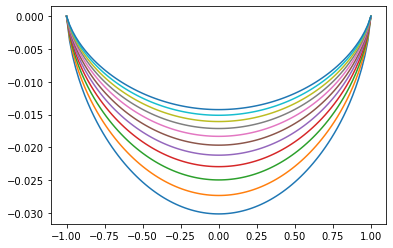

In [46]:
T = 1.0 # final time
num_steps = 10 # number of time steps
dt = T / num_steps # time step size

# Define variational problem
u = TrialFunction(V)
v = TestFunction(V)
a = u*v*dx - dt*alpha_(u_n_old)*inner(nabla_grad(u), nabla_grad(v))*dx
L = u_n_old*v*dx

# Time-stepping
u = Function(V)
t = 0
fid = File("burger_eq/solution.pvd")
while t <= T:
    # Update time
    t += dt
    # Solve variational problem at current time step with piccard
    eps = 1
    tol = 1.0E-5
    iter = 0
    maxiter = 25
    while eps > tol and iter < maxiter:
        iter += 1
        solve(a == L, u, bc)
        eps = errornorm(u_n_old, u, norm_type='L2', degree_rise=3)
        u_n_old.assign(u)
    # Plot solution
    plot(u)
    # Update previous solution
    u_n_old.assign(u)
    fid << u, t